In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("./Data/HotelCustomersDataset.xlsx")

In [3]:
hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

C:\Users\mtagh\AppData\Local\Temp\ipykernel_27088\3597848612.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")


In [4]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [5]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [6]:
hotels['date']

0       2018-08-03
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
83585   2018-12-31
83586   2018-12-31
83587   2018-12-31
83588   2018-12-31
83589   2018-12-31
Name: date, Length: 83590, dtype: datetime64[ns]

In [7]:
hotels['year_month'] = hotels['date'].apply(lambda x: str(x.year) + "-" + str(x.month))
hotels['month'] = hotels['date'].apply(lambda x: int(x.month))
hotels['year'] = hotels['date'].apply(lambda x: int(x.year))

# Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and axis labels, remove scientific notation, and add a legend.

Consider modifying the font sizes as well.

In [8]:
monthly_revenue = hotels.groupby('year_month').agg({'month': 'first', 'year': 'first', 'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
monthly_revenue.sort_values(by=['year','month'], ascending=True, inplace=True)
monthly_revenue = monthly_revenue[['LodgingRevenue','OtherRevenue']]
monthly_revenue

,LodgingRevenue,OtherRevenue
year_month,,
2016-1,124531.34,52190.50
2016-2,131689.12,51203.13
2016-3,443476.86,127336.11
2016-4,500966.80,145228.87
2016-5,634200.17,143359.35
2016-6,588701.29,151214.74
2016-7,749828.61,210745.90
2016-8,842445.29,238536.04
2016-9,774270.05,181678.34


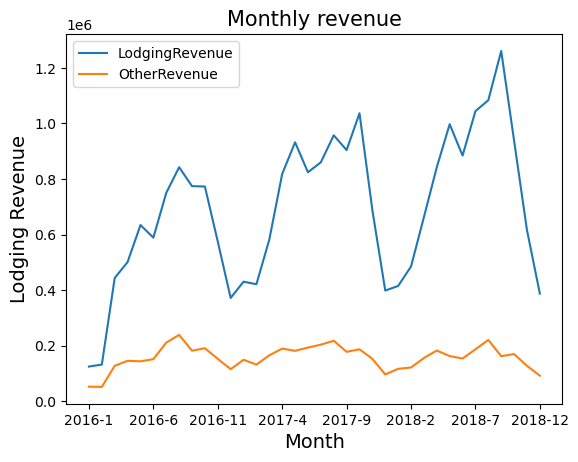

In [9]:
monthly_revenue.plot()
plt.title("Monthly revenue", fontsize = 15)
plt.ylabel("Lodging Revenue", fontsize = 14)
plt.xlabel("Month", fontsize = 14)
plt.show()

# Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.


In [10]:
books_cancels = hotels.groupby('date').agg({'RoomNights': 'sum', 'BookingsCanceled': 'sum'})
books_cancels = books_cancels.resample("Q").sum()
books_cancels.sort_values(by=['date'], ascending=True, inplace=True)

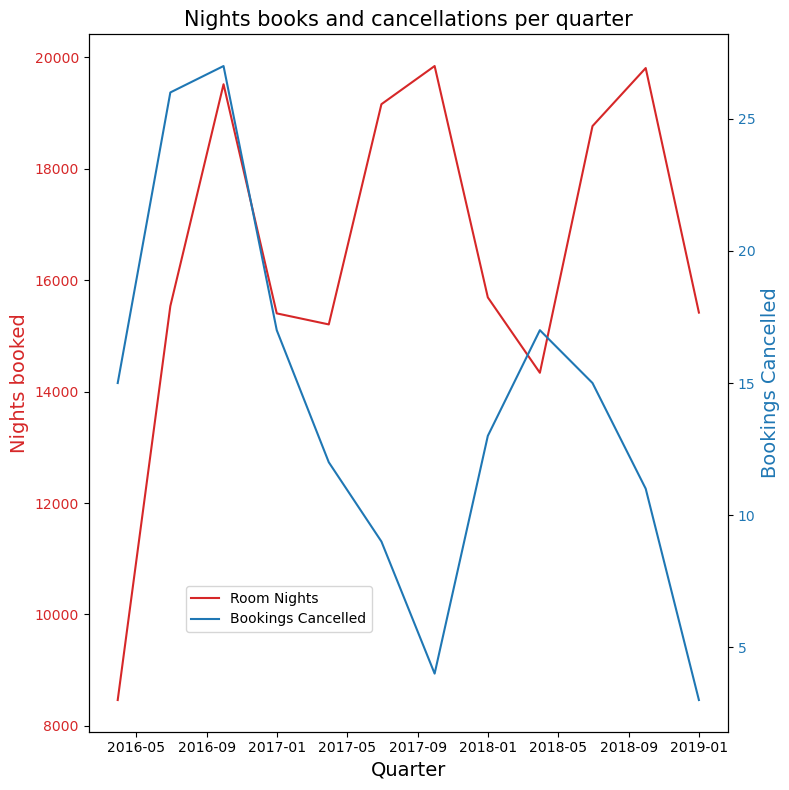

In [11]:
fig, ax1 = plt.subplots(figsize=(8,8))

color = 'tab:red'
ax1.set_title("Nights books and cancellations per quarter", fontsize=15)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Nights booked', color=color, fontsize=14)
ax1.plot(books_cancels['RoomNights'], label='Room Nights', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Bookings Cancelled', color=color,fontsize=14)  # we already handled the x-label with ax1
ax2.plot(books_cancels['BookingsCanceled'], label='Bookings Cancelled', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(bbox_to_anchor=(.48, .27))
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [34]:
vals_by_country = hotels.groupby("Nationality").agg({'RoomNights': 'sum', 'LodgingRevenue': 'sum'})

revenue_by_country = vals_by_country['LodgingRevenue'].copy()
revenue_by_country.sort_values(ascending=False, inplace=True)
revenue_by_country = revenue_by_country.head(10)

nights_by_country = vals_by_country['RoomNights'].copy()
nights_by_country.sort_values(ascending=False, inplace=True)
nights_by_country = nights_by_country.head(10)
nights_by_country

Nationality
FRA    31018
DEU    26334
PRT    24334
GBR    20822
ESP    10877
ITA     8046
BEL     7758
NLD     6619
BRA     6535
USA     6495
Name: RoomNights, dtype: int64

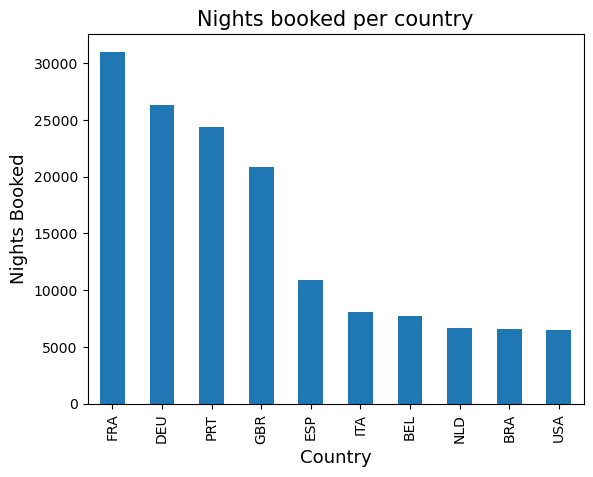

In [35]:
nights_by_country.plot(kind='bar')
plt.title("Nights booked per country", fontsize = 15)
plt.ylabel("Nights Booked", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.show()

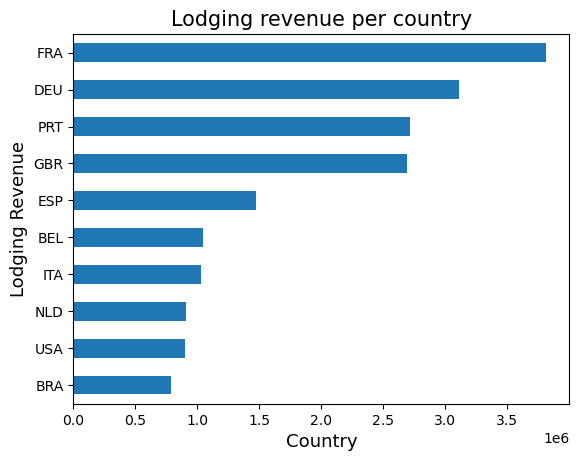

In [38]:
revenue_by_country.sort_values().plot(kind='barh')
plt.title("Lodging revenue per country", fontsize = 15)
plt.ylabel("Lodging Revenue", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.show()

# Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries by room nights.
* Plot the LodgingRevenue and OtherRevenue side by side.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

In [47]:
list(hotels.groupby("Nationality").RoomNights.sum().sort_values(ascending=False)[:5].index)

['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

In [48]:
top_countries = list(hotels.groupby("Nationality").RoomNights.sum().sort_values(ascending=False)[:5].index)

In [53]:
top_country_revenues = hotels.groupby("Nationality").agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
top_country_revenues.index

Index(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA',
       ...
       'UZB', 'VCT', 'VEN', 'VIR', 'VNM', 'WLF', 'WSM', 'YEM', 'ZAF', 'ZWE'],
      dtype='object', name='Nationality', length=188)

In [56]:
top_country_revenues = top_country_revenues.filter(items=top_countries, axis=0)
top_country_revenues

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


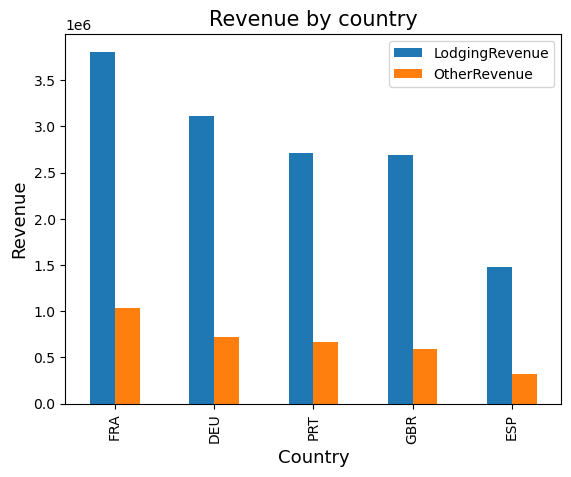

In [58]:
top_country_revenues.plot(kind='bar')
plt.title("Revenue by country", fontsize = 15)
plt.ylabel("Revenue", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.show()

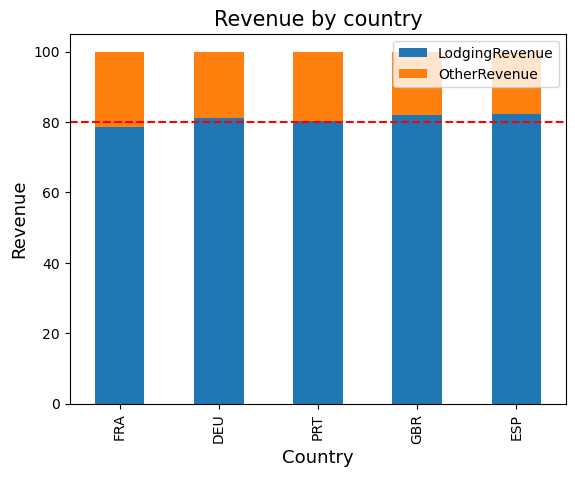

In [67]:
stacked_plot_data = top_country_revenues.copy()
stacked_plot_data['sum'] = stacked_plot_data['LodgingRevenue'] + stacked_plot_data['OtherRevenue']
stacked_plot_data['LodgingRevenue'], stacked_plot_data['OtherRevenue'] = stacked_plot_data['LodgingRevenue'] / stacked_plot_data['sum'] * 100, stacked_plot_data['OtherRevenue'] / stacked_plot_data['sum'] * 100
stacked_plot_data.drop('sum', axis=1, inplace=True)

ax = stacked_plot_data.plot(kind='bar', stacked=True)
plt.title("Revenue by country", fontsize = 15)
plt.ylabel("Revenue", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
ax.axhline(80, 0, 1, c="red", ls="--")
plt.show()

# Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [118]:
pie_chart_data = hotels.groupby("Nationality").LodgingRevenue.sum()
pie_chart_data.index = pie_chart_data.index.map(lambda x: x if x in top_countries else 'OTHER')
pie_chart_data = pie_chart_data.groupby(pie_chart_data.index).sum()
pie_chart_data.sort_values(ascending=False, inplace=True)
pie_chart_data

Nationality
OTHER    11170126.66
FRA       3809315.59
DEU       3113382.55
PRT       2715008.72
GBR       2693123.61
ESP       1475909.33
Name: LodgingRevenue, dtype: float64

In [119]:
pie_chart_sum = pie_chart_data.sum()
pie_chart_data = pie_chart_data / pie_chart_sum * 100
pie_chart_data

Nationality
OTHER    44.721890
FRA      15.251375
DEU      12.465065
PRT      10.870093
GBR      10.782472
ESP       5.909105
Name: LodgingRevenue, dtype: float64

In [155]:
pie_chart_data = pd.concat([pie_chart_data[[0]], pie_chart_data[1:].sort_values()])
pie_chart_data

Nationality
OTHER    44.721890
ESP       5.909105
GBR      10.782472
PRT      10.870093
DEU      12.465065
FRA      15.251375
Name: LodgingRevenue, dtype: float64

Text(0.5, 1.0, 'Percent of Revenue by Country')

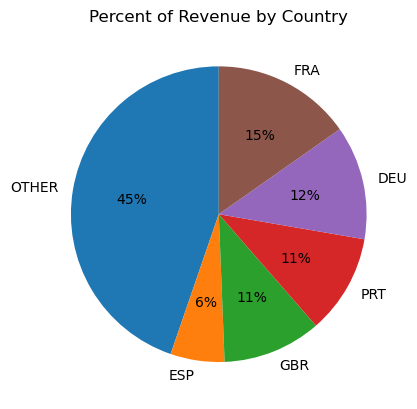

In [156]:
fig, ax = plt.subplots()

ax.pie(pie_chart_data, 
       startangle=90,
       labels = pie_chart_data.index,
       autopct='%.0f%%')

ax.set_title("Percent of Revenue by Country")

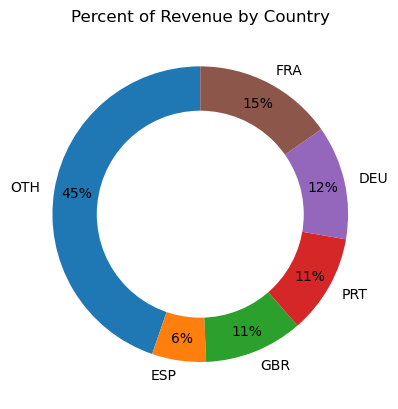

In [157]:
fig, ax = plt.subplots()

ax.pie(pie_data["LodgingRevenue"], 
       startangle=90,
       labels = pie_data.index,
       autopct='%.0f%%',
       pctdistance=.85)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

ax.set_title("Percent of Revenue by Country");